# Camara Calibration
This is done using the OpenCV function [`cv2.findChessboardCorners()`](http://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#cv2.findChessboardCorners) and [`cv2.calibrateCamera()`](https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#calibratecamera)

`cv2.findChessboardCorners()` find the corners of opposing white and black squares within a chessboard. These will be used to calculate the distortion coefficients and the camera matrix with `cv2.calibrateCamera()`

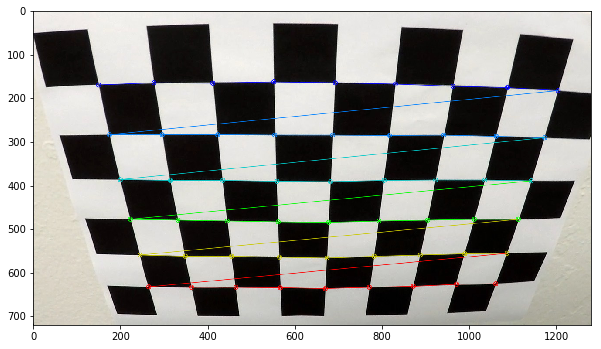

In [7]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

horz_corners = 9
vert_corner  = 6

draw_chessboard = True
calibration_images_file_filter = 'camera_cal/calibration*.jpg'

# Arrays to store object point and image points from all images
all_object_points = [] # 3D points in real world space
all_image_points  = [] # 2D points in image plane

# Prepare object points 
object_points = np.zeros((horz_corners * vert_corner, 3), np.float32)

# generate coordinates
object_points[:,:2] = np.mgrid[0:horz_corners, 0:vert_corner].T.reshape(-1,2)

# get all filename
calibration_images_file_names = glob.glob(calibration_images_file_filter)

for calibration_image_file_name in calibration_images_file_names: 
    calibration_image = mpimg.imread(calibration_image_file_name)
    
    # convert image to gray scale
    gray_calibration_image = cv2.cvtColor(calibration_image, cv2.COLOR_RGB2GRAY)
    
    # find chessboard corners
    ret, corners = cv2.findChessboardCorners(
        gray_calibration_image, (horz_corners, vert_corner), None)
    
    if ret == True:
        all_image_points.append(corners)
        all_object_points.append(object_points)
        
        if (draw_chessboard == True):
            calibration_image = cv2.drawChessboardCorners(
                calibration_image, (horz_corners, vert_corner), corners, ret
            )
            '''
            f, (a0, a1) = plt.subplots(1,2, figsize=(9, 7), gridspec_kw = {'width_ratios':[1, 1]})
            a0.imshow(calibration_image)
            a1.imshow(calibration_image)
            f.tight_layout()
            '''
            draw_chessboard = False
            plt.figure(figsize=(10,8)) 
            plt.imshow(calibration_image)
        


We can use now the object points and image points to calibrate the camera

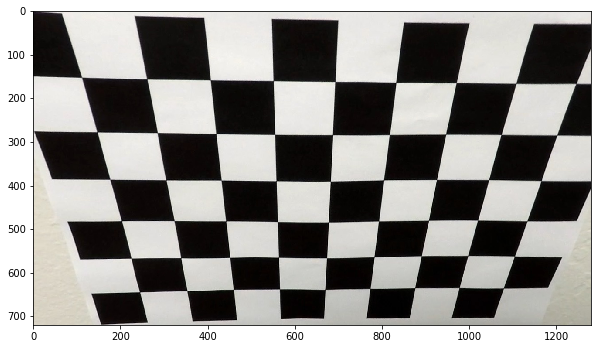

In [11]:
import pickle

# read a distorted image
distorted_image = mpimg.imread('camera_cal/calibration2.jpg')

# calibrate camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(all_object_points, all_image_points, distorted_image.shape[1::-1], None, None)

# undistort
undistorted_image = cv2.undistort(distorted_image, mtx, dist, None, mtx)
plt.figure(figsize=(10,8))
plt.imshow(undistorted_image)

# save distortion coefficients and the camera matrix
calibration_data = {"mtx": mtx, "dist" : dist }
pickle.dump(calibration_data, open("camera_cal_data/camera_calibration_data.p", "wb"))
